In [60]:
%%shell
jupyter nbconvert --to html /content/Project_1_Part_1_CNN.ipynb

[NbConvertApp] Converting notebook /content/Project_1_Part_1_CNN.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 756166 bytes to /content/Project_1_Part_1_CNN.html


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os

# Path to your zip file in Google Drive
zip_path = '/content/drive/My Drive/Flies/CNN P1/plant-seedlings-classification.zip'

# Destination folder to extract files
extract_path = '/content/drive/My Drive/Flies//CNN P1/'

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unzipped successfully!


In [1]:
import os

# Replace this with your target directory path in Google Drive
target_path = '/content/drive/My Drive/Flies/CNN P1/'

X_train = []
y_train = []

# List only folders
folders = [f for f in os.listdir(target_path) if os.path.isdir(os.path.join(target_path, f))]

print("Folders in the directory:")
for folder in folders:
    print(folder)


Folders in the directory:
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
ShepherdΓÇÖs Purse
Small-flowered Cranesbill
Sugar beet
nonsegmentedv2
Black-grass
Charlock
Cleavers


In [2]:
import os
import cv2

X_train = []
y_train = []

base_path = '/content/drive/My Drive/Flies/CNN P1/'  # update this path

for i in os.listdir(base_path):
    folder_path = os.path.join(base_path, i)
    if os.path.isdir(folder_path):
        print(f"Processing folder: {i}")
        for j in os.listdir(folder_path):
            img_path = os.path.join(folder_path, j)
            dummy = cv2.imread(img_path)
            if dummy is not None:
                dummy = cv2.resize(dummy, (128, 128))
                X_train.append(dummy)
                y_train.append(i)


Processing folder: Common Chickweed
Processing folder: Common wheat
Processing folder: Fat Hen
Processing folder: Loose Silky-bent
Processing folder: Maize
Processing folder: Scentless Mayweed
Processing folder: ShepherdΓÇÖs Purse
Processing folder: Small-flowered Cranesbill
Processing folder: Sugar beet
Processing folder: nonsegmentedv2
Processing folder: Black-grass
Processing folder: Charlock
Processing folder: Cleavers


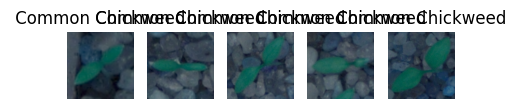

In [3]:


# visualizing the first 10 images in the dataset and their labels

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import seaborn as sns

N=5  # NUMBER OF IMAGES YOU WISH TO SEE

plt.figure(figsize=(N, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_train[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title(" {} ".format(y_train[i]))
    plt.axis('off')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train_ML, X_val_ML, y_train_ML, y_val_ML = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print(len(X_train_ML))
print(len(X_val_ML))

4431
1108


In [5]:
import numpy as np

X_train = np.array(X_train_ML)
X_train.shape

(4431, 128, 128, 3)

In [6]:
import numpy as np

X_test = np.array(X_val_ML)
X_test.shape

(1108, 128, 128, 3)

array([[[ 79,  93, 103],
        [ 81,  95, 105],
        [ 84,  99, 107],
        ...,
        [ 78,  90, 102],
        [ 82,  93, 104],
        [ 84,  95, 106]],

       [[ 86, 101, 110],
        [ 87, 102, 111],
        [ 88, 103, 111],
        ...,
        [ 80,  93, 104],
        [ 83,  95, 106],
        [ 85,  96, 107]],

       [[ 98, 112, 121],
        [ 96, 111, 120],
        [ 94, 110, 118],
        ...,
        [ 84,  97, 108],
        [ 85,  97, 108],
        [ 86,  97, 108]],

       ...,

       [[ 71,  89, 113],
        [ 64,  82, 108],
        [ 54,  71, 100],
        ...,
        [ 82,  95, 111],
        [ 83,  95, 112],
        [ 83,  96, 113]],

       [[ 67,  85, 110],
        [ 62,  79, 106],
        [ 54,  72, 100],
        ...,
        [ 80,  93, 110],
        [ 80,  93, 110],
        [ 80,  92, 110]],

       [[ 65,  82, 109],
        [ 61,  78, 105],
        [ 54,  72, 100],
        ...,
        [ 79,  92, 110],
        [ 78,  91, 109],
        [ 78,  90, 109]]], dtype=uint8)
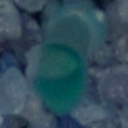

In [7]:

X_train[0]

array([[[ 75,  88, 101],
        [ 77,  95, 105],
        [ 59,  84, 105],
        ...,
        [ 50,  47,  58],
        [ 50,  50,  60],
        [ 54,  54,  60]],

       [[ 18,  32,  57],
        [ 51,  78,  93],
        [ 68,  99, 118],
        ...,
        [ 48,  48,  58],
        [ 50,  50,  61],
        [ 49,  50,  58]],

       [[ 21,  39,  61],
        [ 58,  87,  99],
        [ 73, 103, 117],
        ...,
        [ 49,  49,  55],
        [ 51,  51,  60],
        [ 50,  49,  59]],

       ...,

       [[ 53,  66,  84],
        [ 27,  48,  70],
        [ 31,  46,  70],
        ...,
        [ 45,  47,  54],
        [ 47,  46,  52],
        [ 44,  45,  50]],

       [[ 55,  72,  90],
        [ 33,  56,  82],
        [ 46,  69,  95],
        ...,
        [ 42,  42,  51],
        [ 47,  46,  53],
        [ 45,  44,  50]],

       [[ 42,  62,  83],
        [ 38,  63,  88],
        [ 53,  81, 105],
        ...,
        [ 56,  55,  66],
        [ 47,  46,  55],
        [ 49,  48,  57]]], dtype=uint8)
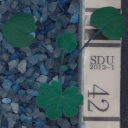

In [8]:
X_test[0]

In [9]:
train_X = X_train.astype('float32')
train_X = X_train.reshape(X_train.shape[0],128,128,3)
train_X = X_train / 255.

test_X = X_test.astype('float32')
test_X = X_test.reshape(X_test.shape[0], 128,128,3)
test_X = X_test / 255.

print('\nTraining data : ', train_X.shape)  # TRAIN

print('\nTesting data : ', test_X.shape) # TEST


Training data :  (4431, 128, 128, 3)

Testing data :  (1108, 128, 128, 3)


In [10]:
# Flatten the images data

# Training data
x_train = []
for i in range(1000):
    x_train.append(train_X[i,:].flatten())

# Testing data
x_test = []
for i in range(500):
    x_test.append(test_X[i,:].flatten())

train_Y=y_train_ML[0:1000]
test_Y=y_val_ML[0:500]

# Print data lengths

print("\n Training data:",len(x_train))
print("\n Training Target data:",len(train_Y))
print("\n Testing data:",len(x_test))
print("\n Testing Target data:",len(test_Y))


 Training data: 1000

 Training Target data: 1000

 Testing data: 500

 Testing Target data: 500


In [11]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


LogR = LogisticRegression()
LogR.fit(x_train, train_Y)

y_pred=LogR.predict(x_train)
LogR_Accuracy_Train = accuracy_score(y_true=train_Y, y_pred=y_pred)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred = LogR.predict(x_test)
LogR_Accuracy_Test = accuracy_score(y_true=test_Y, y_pred=y_pred)
print("Test Accuracy : ", LogR_Accuracy_Test*100)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  1.0
Test Accuracy :  40.2


In [12]:
# NB - Find the best NBs kernels

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

k=[BernoulliNB,GaussianNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(x_train, train_Y)
    print ('kernel is =',k[i], '\tScore=',NB_Classifier.score(x_test, test_Y)*100)

kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 16.6
kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 16.6


In [13]:
# NB - Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(x_train, train_Y)

y_pred = NB.predict(x_train)
NB_Accuracy_Train=accuracy_score(train_Y, y_pred, normalize = True)
print("Train Accuracy: ", NB_Accuracy_Train*100)

y_pred = NB.predict(x_test)
NB_Accuracy_Test=accuracy_score(test_Y, y_pred, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test*100)

Train Accuracy:  28.9
Test Accuracy :  16.6


In [14]:
# SVM - Model
from sklearn.svm import SVC
SVM = SVC(C=0.9,kernel='linear')
SVM.fit(x_train, train_Y)

SVM_Accuracy=SVM.score(x_train, train_Y)
print("Train Accuracy : ", SVM_Accuracy)

SVM_Accuracy=SVM.score(x_test, test_Y)
print("Test Accuracy : ", SVM_Accuracy)

Train Accuracy :  1.0
Test Accuracy :  0.428


In [15]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(x_train, train_Y)

y_pred = KNN.predict(x_train)
KNN_Accuracy_Train=accuracy_score(train_Y, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(x_test)
KNN_Accuracy_Test=accuracy_score(test_Y, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.337
Test Accuracy :  0.216


In [16]:
# Decision Tree

# Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='entropy',
                                splitter='best',
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                #max_features=None,
                                random_state=None,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                #min_impurity_split=None,
                                class_weight=None,
                                #presort='deprecated',
                                ccp_alpha=0.0,)

model_DT.fit(x_train, train_Y)

# Accuracy
DT_Train=model_DT.score(x_train, train_Y)
DT_Test=model_DT.score(x_test, test_Y)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.45
Test Accuracy: 0.212


In [17]:
# ADA Boosting

# Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Model
model = AdaBoostClassifier( #base_estimator=None,    # SVC(), RandomForestClassifier(), GradientBoostingClassifier()
                            n_estimators=10,
                            learning_rate=1.0,
                            algorithm='SAMME',     # try using SVC() as base estimator above
                            random_state=None,)
model_AB = model.fit(x_train, train_Y)

# Accuracy
AB_Train = model_AB.score(x_train, train_Y)
pred_AB =model_AB.predict(x_test)
acc_AB = accuracy_score(test_Y, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Train Accuracy: 0.255
Test Accuracy: 0.182


In [18]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    #max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    #min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)
model_RF.fit(x_train, train_Y)

# Accuracy
pred_RF = model_RF.predict(x_test)
RF_Train = model_RF.score(x_train, train_Y)
RF_Test = accuracy_score(test_Y, pred_RF)

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 1.0
Test Accuracy: 0.346


In [19]:
# GRADIENT BOOSTING


# Library
from sklearn.ensemble import GradientBoostingClassifier

# Model
model = GradientBoostingClassifier(loss='log_loss',
                                    learning_rate=0.1,
                                    n_estimators=10,
                                    subsample=1.0,
                                    criterion='friedman_mse',
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_depth=3,
                                    min_impurity_decrease=0.0,
                                    #min_impurity_split=None,
                                    init=None,
                                    random_state=None,
                                    #max_features=None,
                                    verbose=1,
                                    max_leaf_nodes=None,
                                    warm_start=False,
                                    #presort='deprecated',
                                    validation_fraction=0.1,
                                    n_iter_no_change=None,
                                    tol=0.0001,
                                    ccp_alpha=0.0)
model_GB = model.fit(x_train, train_Y)

# Accuracy
GB_Train = model_GB.score(x_train, train_Y)
pred_GB =model_GB.predict(x_test)
acc_GB = accuracy_score(test_Y, pred_GB)

print("Training Accuracy:",GB_Train)
print("Testing Accuracy:",acc_GB)

      Iter       Train Loss   Remaining Time 
         1           2.0472           23.16m
         2           1.8309           20.70m
         3           1.6591           18.05m
         4           1.5235           15.43m
         5           1.4060           12.82m
         6           1.3003           10.24m
         7           1.2084            7.66m
         8           1.1175            5.11m
         9           1.0413            2.55m
        10           0.9667            0.00s
Training Accuracy: 0.922
Testing Accuracy: 0.31


In [20]:
import pandas as pd

# Comparison table

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogR_Accuracy_Train,
                           'Test accuracy': LogR_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train,
                           'Test accuracy': NB_Accuracy_Test},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train,
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['SVM'], 'Train accuracy': DT_Train,
                           'Test accuracy': DT_Test})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': LogR_Accuracy_Train,
                            'Test accuracy': LogR_Accuracy_Test})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]



Comparison6 = pd.DataFrame({'Method':['Random Forest'], 'Train accuracy': RF_Train,
                           'Test accuracy': RF_Test})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]



Comparison7 = pd.DataFrame({'Method':['Gradient Boosting'], 'Train accuracy': GB_Train,
                           'Test accuracy': acc_GB})
Comparison7 = Comparison7[['Method', 'Train accuracy', 'Test accuracy']]



Comparison8 = pd.DataFrame({'Method':['ADA Boosting'], 'Train accuracy': AB_Train,
                           'Test accuracy': acc_AB})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3,Comparison4,Comparison5,Comparison6,
                        Comparison8])

Comparison

,Method,Train accuracy,Test accuracy
0,Logistic Regression,1.000,0.402
0,Naive Bayes Regression,0.289,0.166
0,KNN,0.337,0.216
0,SVM,0.450,0.212
0,Decision Tree,1.000,0.402
0,Random Forest,1.000,0.346
0,ADA Boosting,0.255,0.182


In [21]:
from sklearn.model_selection import train_test_split


X_train_ML, X_val_ML, y_train_ML, y_val_ML = train_test_split(x_train, train_Y, test_size=0.2, random_state=2)

print(len(X_train_ML))
print(len(X_val_ML))

import numpy as np

X_train = np.array(X_train_ML)
X_train.shape

800
200


(800, 49152)

In [22]:
X_test = np.array(X_val_ML)
X_test.shape

(200, 49152)

In [23]:
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0], 49152) # 49152 = 128 * 128 * 3
X_train = X_train / 255.

X_test = X_test.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 49152)
X_test = X_test / 255.

print('\nTraining data : ', X_train.shape)  # TRAIN

print('\nTesting data : ', X_test.shape) # TEST





Training data :  (800, 49152)

Testing data :  (200, 49152)


In [24]:
import pandas as pd
# one hot encode outputs
y_train = pd.get_dummies(y_train_ML)
y_test = pd.get_dummies(y_val_ML)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 10

In [25]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)   # Scale train data
X_test = StandardScaler().fit_transform(X_test)     # Scale test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 49152)
(800, 12)
(200, 49152)
(200, 12)


In [26]:
### define model
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation


# create model
model = Sequential()
model.add(BatchNormalization(input_shape = (49152,)))  ### Batch_Norm Layer

model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
adam = optimizers.Adam(learning_rate=1e-3)
NN_Model=model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 49152)          │       196,608 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,802,860 (48.84 MB)

 Trainable params: 12,704,556 (48.46 MB)

 Non-trainable params: 98,304 (384.00 KB)

In [27]:
# Fit the model
nn_Model_C=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=20, verbose=1)

Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - accuracy: 0.1226 - loss: 5.6797 - val_accuracy: 0.1300 - val_loss: 2.8451
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.1666 - loss: 2.5002 - val_accuracy: 0.1900 - val_loss: 2.6711
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.3172 - loss: 2.0681 - val_accuracy: 0.1850 - val_loss: 2.4329
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step - accuracy: 0.3638 - loss: 1.8805 - val_accuracy: 0.2150 - val_loss: 2.3731
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.4674 - loss: 1.6217 - val_accuracy: 0.1650 - val_loss: 2.7363
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.3794 - loss: 1.6906 - val_accuracy: 0.2250 - val_loss: 2.5535
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.4933 - loss: 1.4846 - val_accuracy: 0.2650 - val_loss: 2.7118
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.5012 - loss: 1.5003 - val_accu

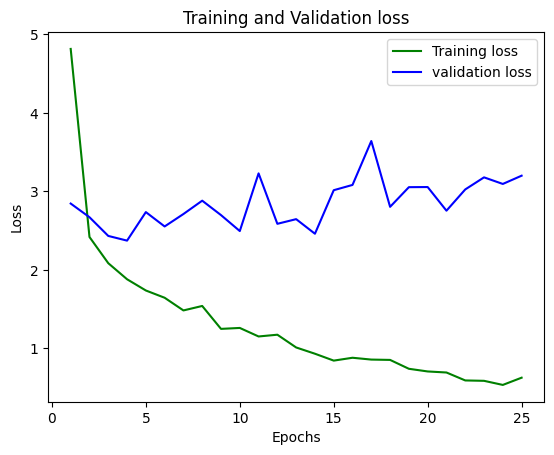

In [28]:
EPOCH=25
loss_train = nn_Model_C.history['loss']
loss_val = nn_Model_C.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


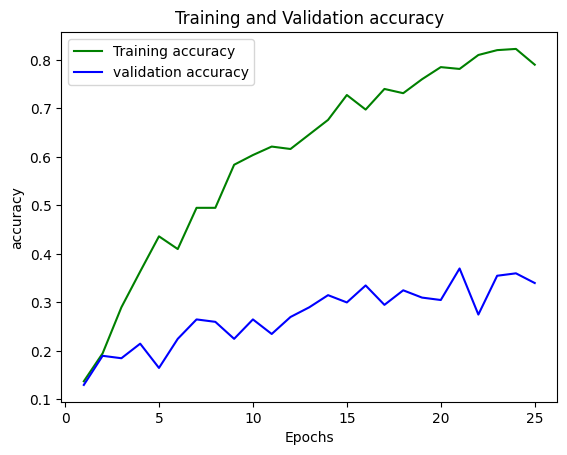

In [29]:
Acc_train = nn_Model_C.history['accuracy']
Acc_val = nn_Model_C.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
#NN_Model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

compile_metrics: 34.00%


In [31]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assume X_train_ML, X_val_ML, y_train_ML, y_val_ML are from skNucTEoiwA6
# These contain the unflattened (128, 128, 3) image data as lists of arrays

# Combine the initial train and val sets to create a full dataset for CNN
X_full_images = np.array(X_train_ML + X_val_ML)
y_full_labels = np.array(y_train_ML + y_val_ML)

# Normalize the image data to [0, 1]
X_full_images_normalized = X_full_images.astype('float32') / 255.0

# Split the data into training and testing sets for CNN
X_train_cnn, X_test_cnn, y_train_cnn_labels, y_test_cnn_labels = train_test_split(
    X_full_images_normalized, y_full_labels, test_size=0.2, random_state=2
)

# One-hot encode the labels
y_train_cnn = pd.get_dummies(y_train_cnn_labels).values
y_test_cnn = pd.get_dummies(y_test_cnn_labels).values

# Assign to the global variables expected by the model.fit call
X_train = X_train_cnn
y_train = y_train_cnn
X_test = X_test_cnn
y_test = y_test_cnn

print(f"X_train shape: {X_train.shape}") # Expected (num_samples, 128, 128, 3)
print(f"y_train shape: {y_train.shape}") # Expected (num_samples, num_classes)
print(f"X_test shape: {X_test.shape}")  # Expected (num_samples, 128, 128, 3)
print(f"y_test shape: {y_test.shape}")  # Expected (num_samples, num_classes)

# Define num_classes here, as it's used in CNN model definition.
num_classes = y_train.shape[1]

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

#Reshape data into shapes compatible with Keras models (will do if needed)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_val = X_val.reshape(X_val.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

print(f"X_train shape: {X_train.shape}") # Expected (num_samples, 128, 128, 3)
print(f"y_train shape: {y_train.shape}") # Expected (num_samples, num_classes)
print(f"X_test shape: {X_test.shape}")  # Expected (num_samples, 128, 128, 3)
print(f"y_test shape: {y_test.shape}")  # Expected (num_samples, num_classes)
print(f"X_val shape: {X_val.shape}")  # Expected (num_samples, num_classes)
print(f"y_val shape: {y_val.shape}")  # Expected (num_samples, num_classes)

X_train shape: (800, 49152)
y_train shape: (800, 12)
X_test shape: (200, 49152)
y_test shape: (200, 12)
X_train shape: (800, 128, 128, 3)
y_train shape: (800, 12)
X_test shape: (100, 128, 128, 3)
y_test shape: (100, 12)
X_val shape: (100, 128, 128, 3)
y_val shape: (100, 12)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras import optimizers

# --- build model with final units = num_classes ---
model = Sequential()
model.add(BatchNormalization(input_shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# final layer must match num_classes
model.add(Dense(units=num_classes, activation='softmax'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 128, 128, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 63, 63, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 986,936 (3.76 MB)

 Trainable params: 986,930 (3.76 MB)

 Non-trainable params: 6 (24.00 B)

In [ ]:
# --- fit on training set, validate on validation set ---
Cnn = model.fit(
    X_train, y_train,
    batch_size=30,
    epochs=25,
    validation_data=(X_val, y_val),
    shuffle=True,
    verbose=1
)


Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.1538 - loss: 2.4818 - val_accuracy: 0.2300 - val_loss: 2.4604
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1696 - loss: 2.4615 - val_accuracy: 0.2300 - val_loss: 2.4256
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1538 - loss: 2.4450 - val_accuracy: 0.2300 - val_loss: 2.4043
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1397 - loss: 2.4394 - val_accuracy: 0.2300 - val_loss: 2.4055
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1480 - loss: 2.4214 - val_accuracy: 0.0900 - val_loss: 2.4116
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1261 - loss: 2.4403 - val_accuracy: 0.2300 - val_loss: 2.3844
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1490 - loss: 2.4333 - val_accuracy: 0.2300 - val_loss: 2.3881
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.1349 - loss: 2.4249 - val_accuracy: 0.0900 - val_loss:

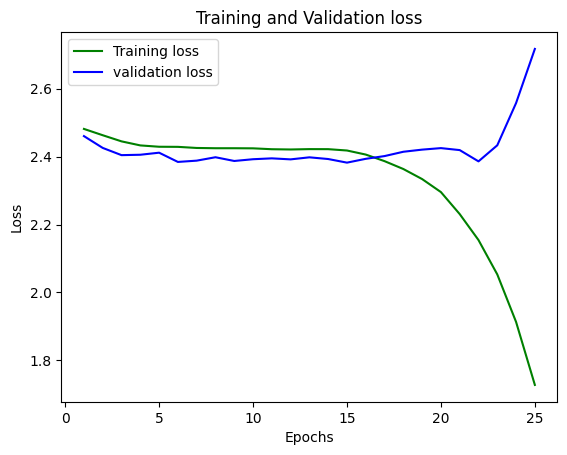

In [59]:
EPOCH=25
loss_train = Cnn.history['loss']
loss_val = Cnn.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

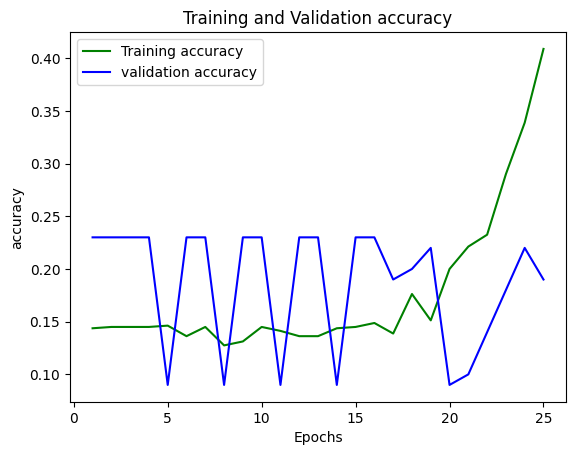

In [57]:
Acc_train = Cnn.history['accuracy']
Acc_val = Cnn.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [58]:
scores = model.evaluate(X_val, y_val)
print('Loss: {}, Accuracy: {}'.format(scores[0], scores[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.2041 - loss: 2.5871
Loss: 2.717263698577881, Accuracy: 0.1899999976158142


In [56]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
CNN_model_json =model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(CNN_model_json)
# Pickle weights to HDF5
model.save_weights("model.weights.h5")
print("Saved model to disk")

Saved model to disk


In [53]:
import os
import cv2
import numpy as np

# Path to image
img_path = '/content/drive/My Drive/Flies/CNN P1/Prediction.jpg'

# Read image
P = cv2.imread(img_path)
if P is None:
    raise FileNotFoundError(f"Could not read image: {img_path}")

# Resize and convert to RGB (OpenCV loads BGR)
P = cv2.resize(P, (128, 128))
P = cv2.cvtColor(P, cv2.COLOR_BGR2RGB)

# Option A: create batch using np.expand_dims
P = P.astype('float32') / 255.0
predict_image = np.expand_dims(P, axis=0)   # shape -> (1, 128, 128, 3)

print("predict_image.shape:", predict_image.shape)


predict_image.shape: (1, 128, 128, 3)


In [54]:
predict_image

array([[[[0.02352941, 0.03137255, 0.00392157],
         [0.00784314, 0.00784314, 0.        ],
         [0.00392157, 0.02352941, 0.00392157],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.0627451 , 0.04705882, 0.01176471],
         [0.07058824, 0.07843138, 0.02745098],
         [0.00392157, 0.00784314, 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.05882353, 0.02745098, 0.00784314],
         [0.09803922, 0.09411765, 0.03529412],
         [0.02745098, 0.05098039, 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.01960784, 0.        ],
         [0.        , 0.05098039, 0.00784314]

In [55]:
from PIL import Image

# creating a object
im = Image.open(r"/content/drive/My Drive/Flies/CNN P1/Prediction.jpg")

im.show()

In [47]:
result=model.predict(predict_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
Prob=np.argmax(result)

In [49]:
print (Prob)

6


In [50]:
Class_Label= list(folders)

In [51]:
lable=Class_Label[Prob-1]

In [52]:
print(Class_Label[Prob-1])

Scentless Mayweed


Image belongs to the class "Scentless Mayweed"
---

